In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING AND CLEANING DATA:

In [2]:
import pandas as pd
df = pd.read_csv('D:\Rashika\AI FOR BUSINESS/breadbasket.csv',encoding="latin-1")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


SEPARATE DATE TIME COLUMN

In [3]:
df['Dates'] = pd.to_datetime(df['date_time']).dt.date
df['Time'] = pd.to_datetime(df['date_time']).dt.time
df

,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00
...,...,...,...,...,...,...,...
20502,9682,Coffee,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00
20503,9682,Tea,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00
20504,9683,Coffee,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00
20505,9683,Pastry,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00


DROP date_time column

REMOVE MONTHS FROM DATE COLUMN

In [4]:
df['Months'] = pd.to_datetime(df['Dates']).dt.month
df['Months'] = df["Months"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))          
df

,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time,Months
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00,October
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October
...,...,...,...,...,...,...,...,...
20502,9682,Coffee,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September
20503,9682,Tea,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September
20504,9683,Coffee,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September
20505,9683,Pastry,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September


convert Time to hours interval
1. first extract hours from time.
2. convert it to interval

In [5]:
df['Hour'] = pd.to_datetime(df['date_time']).dt.hour
df

,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time,Months,Hour
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00,October,9
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September,14
20503,9682,Tea,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September,14
20504,9683,Coffee,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September,14
20505,9683,Pastry,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September,14


In [6]:
hours_num= (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)
hours_intervals= ('1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-1')
df['Hour']= df['Hour'].replace(hours_num,hours_intervals)
df

,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time,Months,Hour
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00,October,9-10
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September,14-15
20503,9682,Tea,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September,14-15
20504,9683,Coffee,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September,14-15
20505,9683,Pastry,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September,14-15


Convert weekend_weekday column to days name.

In [7]:
df['weekday'] = pd.to_datetime(df['date_time']).dt.weekday
df['weekday']= df['weekday'].replace((0,1,2,3,4,5,6),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time,Months,Hour,weekday
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


Search for missing values:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
 5   Dates            20507 non-null  object
 6   Time             20507 non-null  object
 7   Months           20507 non-null  object
 8   Hour             20507 non-null  object
 9   weekday          20507 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.6+ MB


VISUALIZATION:
1. Count of items.

Text(0.5, 1.0, 'Top 20 Items purchased by customers')

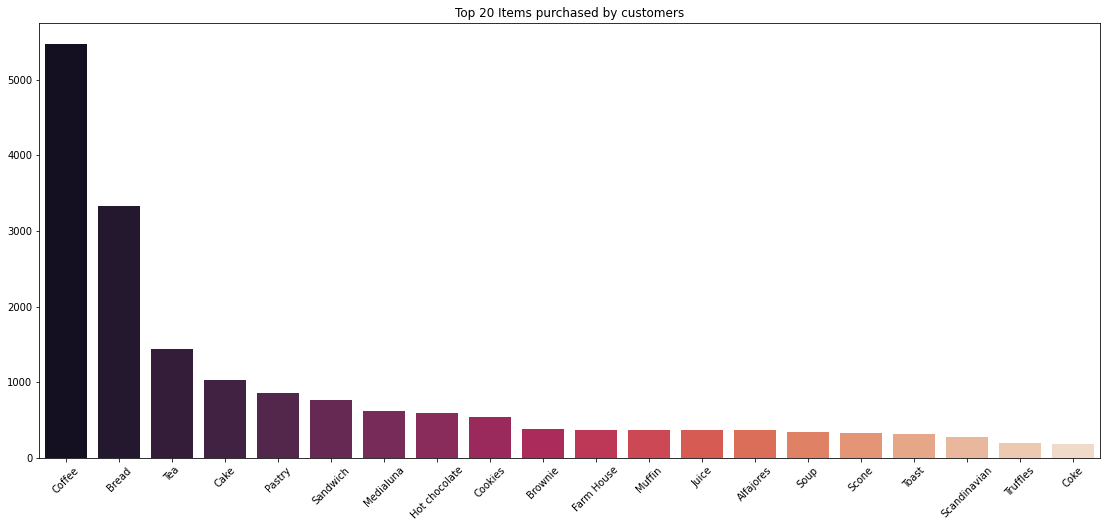

In [9]:
plt.figure(figsize=(19,8))
sns.barplot(x=df.Item.value_counts().head(20).index,y=df.Item.value_counts().head(20).values,palette ='rocket')
plt.xticks(rotation=45)
plt.title('Top 20 Items purchased by customers')

Coffee has highest transaction
And, Coke is 20th most bought product

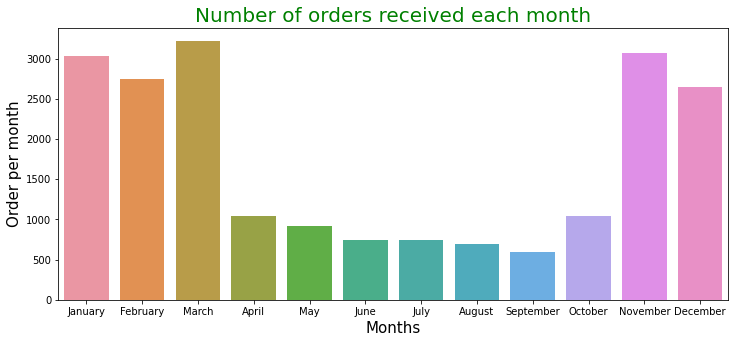

       Months  Transaction  monthorder
4     January         3027           1
3    February         2748           2
7       March         3220           3
0       April         1048           4
8         May          924           5
6        June          739           6
5        July          741           7
1      August          700           8
11  September          596           9
10    October         1041          10
9    November         3076          11
2    December         2647          12


In [10]:
countBYmonth= df.groupby('Months')['Transaction'].count().reset_index()
countBYmonth.loc[:,"monthorder"]= [4,8,12,2,1,7,6,3,5,11,10,9]
countBYmonth.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=countBYmonth,x="Months",y="Transaction")
plt.xlabel('Months',size=15)
plt.ylabel('Order per month',size=15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

plt.show()
print(countBYmonth)


Highest transactions has occured in the month of March, November, January, Feburary and December

  period_day  Transaction  Period_of_the_day
2    morning         8404                  0
0  afternoon        11569                  1
1    evening          520                  2
3      night           14                  3


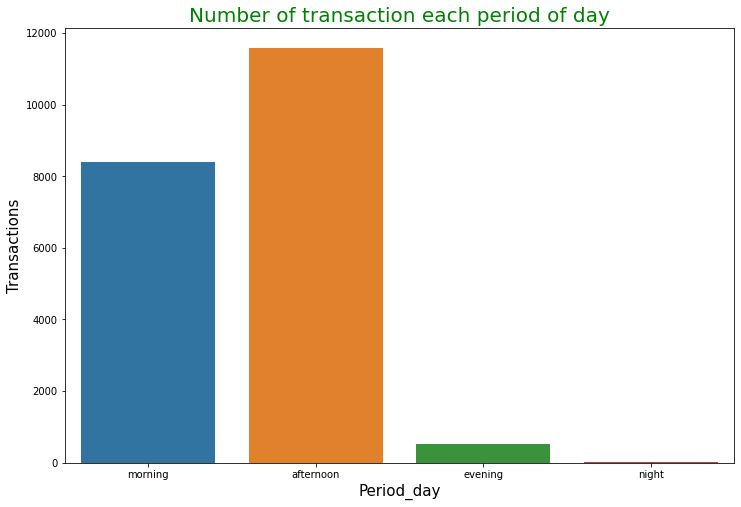

In [11]:
countBYperiod= df.groupby('period_day')['Transaction'].count().reset_index()
countBYperiod.loc[:,"Period_of_the_day"]=[1,2,0,3]
countBYperiod.sort_values("Period_of_the_day",inplace=True)
print(countBYperiod)




plt.figure(figsize=(12,8))
sns.barplot(data=countBYperiod,x="period_day",y="Transaction")
plt.xlabel('Period_day',size=15)
plt.ylabel('Transactions',size=15)
plt.title('Number of transaction each period of day',color='green',size=20)
plt.show()



Highest number of orders are taken during afternoon and morning time.

     Hour  Transaction  hour_order
0     1-2            1           1
15    7-8           24           2
16    8-9          645           3
17   9-10         1966           4
1   10-11         2666           5
2   11-12         3102           6
3   12-13         2854           7
4   13-14         2617           8
5   14-15         2640           9
6   15-16         2115          10
7   16-17         1343          11
8   17-18          368          12
9   18-19           82          13
10  19-20           48          14
11  20-21           22          15
12  21-22            3          16
13  22-23            8          17
14  23-24            3          18


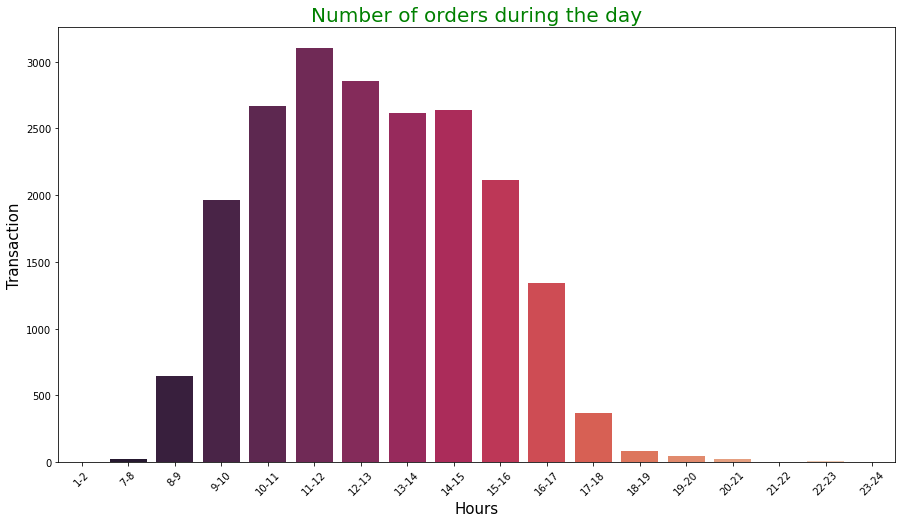

In [12]:
count_by_hour= df.groupby('Hour')['Transaction'].count().reset_index()
count_by_hour.loc[:,"hour_order"]=[1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,2,3,4]
count_by_hour.sort_values("hour_order",inplace=True)
print(count_by_hour)


plt.figure(figsize=(15,8))
sns.barplot(data=count_by_hour,x="Hour",y="Transaction",palette="rocket")
plt.xlabel('Hours',size=15)
plt.xticks(rotation=45)
plt.ylabel('Transaction',size=15)
plt.title("Number of orders during the day",color='green',size=20)
plt.show()


Here, we can notice that maximum transaction is during 11am to 12pm and least from 7pm to 9pm.

     weekday  Transaction  Day_order
1     Monday         3035          1
5    Tuesday         2645          2
6  Wednesday         2288          3
4   Thursday         2601          4
0     Friday         3266          5
2   Saturday         3554          6
3     Sunday         3118          7


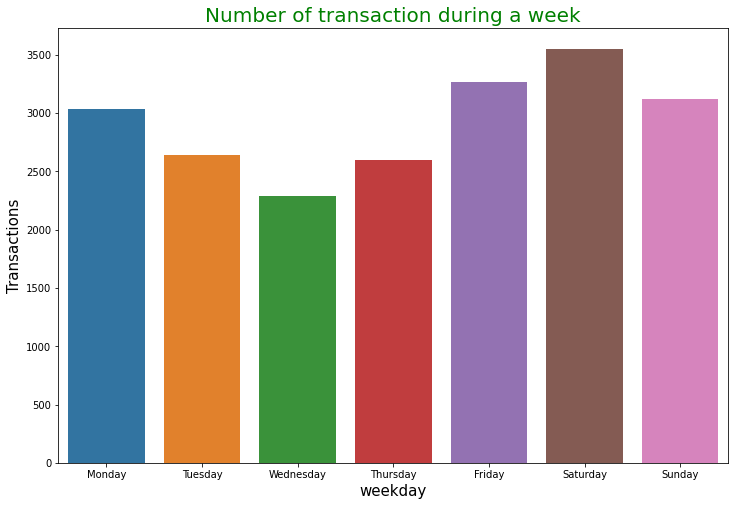

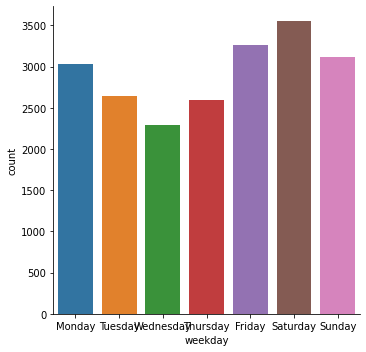

In [13]:
count_by_day= df.groupby('weekday')['Transaction'].count().reset_index()
count_by_day.loc[:,'Day_order']=[5,1,6,7,4,2,3]
count_by_day.sort_values('Day_order',inplace=True)
print(count_by_day)

plt.figure(figsize=(12,8))
sns.barplot(data=count_by_day,x="weekday",y="Transaction")
plt.xlabel('weekday',size=15)
plt.ylabel('Transactions',size=15)
plt.title('Number of transaction during a week',color='green',size=20)
plt.show()

# or 

category_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.catplot(x='weekday', data=df, kind='count', order=category_order)


Highest transaction occurs during weekend, and least during the mid_week.

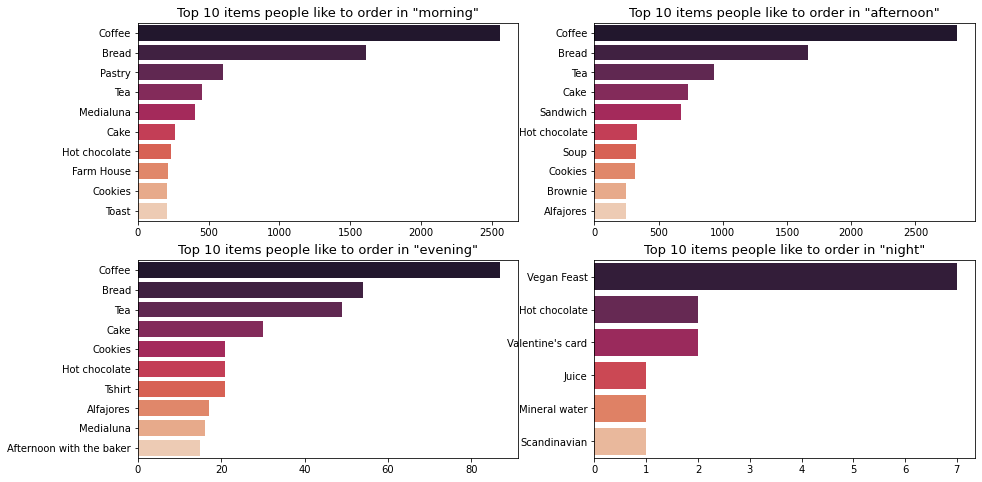

In [14]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df_1= data[data.period_day==j].head(10)
    sns.barplot(data=df_1,y=df_1.Item,x=df_1.Transaction,palette='rocket')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)
    
plt.show()
    

In [15]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time,Months,Hour,weekday
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20503,9682,Tea,9/4/2017 14:32,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20504,9683,Coffee,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday
20505,9683,Pastry,9/4/2017 14:57,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday


In [16]:
seasons = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall',
    'December': 'Winter'
}
seasons_1=[]
for i,j in enumerate(df['Months']):
    seasons_1.append(seasons[j])
df['Seasons'] = seasons_1
df.head()


,Transaction,Item,date_time,period_day,weekday_weekend,Dates,Time,Months,Hour,weekday,Seasons
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday,Fall
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday,Fall
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday,Fall
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday,Fall
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday,Fall


Winter    8422
Spring    5192
Fall      4713
Summer    2180
Name: Seasons, dtype: int64


<Figure size 864x576 with 0 Axes>

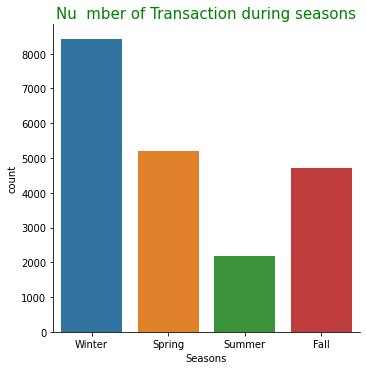

  Seasons  Transaction  Season_order
3  Winter         8422             1
1  Spring         5192             2
2  Summer         2180             3
0    Fall         4713             4


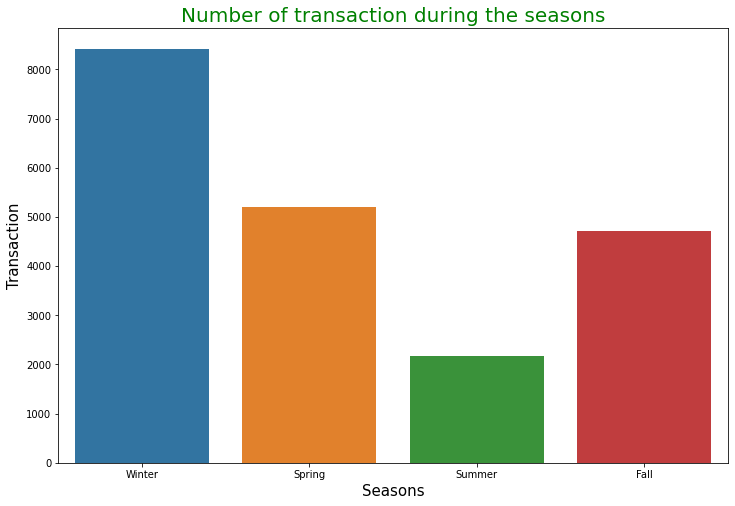

In [17]:
cat_order=['Winter','Spring','Summer','Fall']
ax=df.Seasons.value_counts()
print (ax)
plt.figure(figsize=(12,8))
sns.catplot(data=df,x='Seasons',kind='count', order=cat_order)
plt.title('Nu  mber of Transaction during seasons', size=15,color='green')
plt.show()

# or

count_by_seasons= df.groupby('Seasons')['Transaction'].count().reset_index()
count_by_seasons.loc[:,'Season_order']=[4,2,3,1]
count_by_seasons.sort_values('Season_order',inplace=True)
print(count_by_seasons)

plt.figure(figsize=(12,8))
sns.barplot(data=count_by_seasons, x='Seasons',y='Transaction')
plt.xlabel('Seasons',size=15)
plt.ylabel('Transaction',size=15)
plt.title('Number of transaction during the seasons',size=20, color='green')
plt.show()

Most transactions are occured during winter and spring.

In [18]:
transaction_str= df.groupby(['Transaction','Item']) 
tr= transaction_str['Item'].count()
tr_1= tr.reset_index(name='count') 
print(tr_1)

       Transaction           Item  count
0                1          Bread      1
1                2   Scandinavian      2
2                3        Cookies      1
3                3  Hot chocolate      1
4                3            Jam      1
...            ...            ...    ...
18882         9682   Tacos/Fajita      1
18883         9682            Tea      1
18884         9683         Coffee      1
18885         9683         Pastry      1
18886         9684      Smoothies      1

[18887 rows x 3 columns]


In [19]:
my_basket = tr_1.pivot_table(index='Transaction', columns='Item', values='count', aggfunc='sum').fillna(0)
my_basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Creating a functions:
# It will retun 1 if the item has been in any of the transaction
# It will return 0 if the item is not in the tranaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# apply function:
my_basket_set=my_basket.applymap(encode)
my_basket_set

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [32]:
# using apriori algorithm using min_support= 0.01
frequent_items = apriori(my_basket_set, min_support = 0.01,use_colnames = True)
frequent_items.sort_values('support',inplace=True)
frequent_items

,support,itemsets
60,0.010037,"(Coffee, Cake, Tea)"
58,0.010037,"(Coffee, Cake, Bread)"
30,0.010354,"(Alfajores, Bread)"
20,0.010460,(Salad)
11,0.010565,(Hearty & Seasonal)
...,...,...
34,0.090016,"(Coffee, Bread)"
4,0.103856,(Cake)
26,0.142631,(Tea)
2,0.327205,(Bread)


In [33]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
7,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
34,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
39,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
19,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
23,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
37,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
41,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
15,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
29,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


Findings:
1. The percentage of transactions containing Toast which also contains Coffee is 70.44% [Highest]
   but if someone who buys coffee will also buy toast is just 4.9%
2. In 9465 transactions 47.8% of it contains coffee in it, 32% contains bread, and 14% contains tea.
3. Coffee and bread has the highest support of 9% together out of 9465 transaction.